# imports

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import copy
import numpy as np
import os
from display_aux import *
from ships import SHIPS
from df_aux import *
from time_aux import *
from file_aux import *
from plot_aux import *
from parse_aux import *
from str_aux import *
import sys

In [2]:
%matplotlib ipympl

In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)


# Run definitions

In [4]:
params = {}
params['input_csv_file_name_full'] = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\Combined\\Spire_AIS_Combined_All_20231101_1106_000000000000.csv'
# params['input_csv_file_name_full'] = 'debug_data_base.csv'

params['columns_list_keep'] = None
params['filter_vessels_df_dic'] = {
        'max_time_diff[mins]':['<=',30]
        }
params['reload_level'] = 2
params['reload_df_filt'] = False
params['reload_vessels'] = True
params['save_folder_base'] = './pkl'

params['export_to_excel'] = False
params['ana_vessel_name'] = 'EYVAN'
params['ana_vessel_name'] = 'PENG FENG JI'

# params['df_filter_dic'] = {'position_timestamp':['<=','2023-11-01 02:00:00+0000']}
params['df_filter_dic'] = {}

# Load

In [5]:
save_folder = params['save_folder_base']+'/'+ get_file_base_name(params['input_csv_file_name_full'])

ships = SHIPS(save_folder=save_folder)


In [6]:
df = ships.load_raw_data(params['input_csv_file_name_full'],reload_level=params['reload_level'],save_folder=save_folder)

# filter_df
df = ships.prepare_df(df,reload_level=params['reload_level'],df_filter_dic=params['df_filter_dic'],save_folder=save_folder,columns_list_keep=params['columns_list_keep'])

data_dic = ships.create_data_dic(df,reload_level=params['reload_level'],save_folder=save_folder)


load_row_data
----------------
prepare_df
----------------
load df from ./pkl/Spire_AIS_Combined_All_20231101_1106_000000000000/df_filt.pkl
create_data_dic
----------------


In [7]:
display(df.time.min())
display(df.time.max())

Timestamp('2023-11-01 00:00:00+0000', tz='UTC')

Timestamp('2023-11-01 01:27:53+0000', tz='UTC')

In [8]:
from scipy.signal import find_peaks


ship_df = ships.get_ship_df('ABCC',item_type='name',handle_common_time_rows=True)
ship_df.loc[:,'time_seconds']=ship_df.loc[:,'time_seconds']-ship_df.loc[:,'time_seconds'].min()
# 4039_2
ship_df.head()
# display([ship_df['time_seconds']])
# ships.plot_ship_data('ABCC',pre_process='remove_bias',x_data_type = 'time')
pre_process_params = {
                        'span':{'val':[0,120],'columns':['time_seconds']},
                        # 'unbias':{'columns':['latitude','longitude']},
                      }
ships.plot_ship_data('4039_2',columns=['latitude', 'longitude','time_seconds'],sort_columms='time',pre_process_params = {})

ships.get_ship_stats('4039_2')

plot_ship_data: Unexpected parameter 'sort_columms' found.


{'name': ['4039_2'],
 'len': [11],
 'min_time': Timestamp('2023-11-01 00:01:06+0000', tz='UTC'),
 'max_time': Timestamp('2023-11-01 01:24:43+0000', tz='UTC'),
 'total_time': Timedelta('0 days 01:23:37'),
 'min_time_diff[mins]': 0,
 'max_time_diff[mins]': 20,
 'mean_time_diff[mins]': 8,
 'min_longitude': 118.40710333333332,
 'max_longitude': 122.918605,
 'min_latitude': 29.638753333333334,
 'max_latitude': 38.96700333333333,
 'span_longitude': 4.511501666666675,
 'span_latitude': 9.328249999999997}

In [9]:
# example
info_df = ships.create_info_df(num_lines=1000,reset=True)


create info_df
----------------
processing name 0 out of 1000
save var to ./pkl/Spire_AIS_Combined_All_20231101_1106_000000000000/info_df.pkl


In [10]:
ships.get_info_df_summary()

{'num_total': 54260,
 'num_processed': 54260,
 'min_len': 1.0,
 'max_len': 172.0,
 'min_time': Timestamp('2023-11-01 00:00:00+0000', tz='UTC'),
 'max_time': Timestamp('2023-11-01 01:27:52+0000', tz='UTC'),
 'max_total_time': Timedelta('0 days 01:27:10'),
 'min_latitude': 25.141128333333327,
 'max_latitude': 40.64010333333333,
 'min_longitude': 30.58640666666667,
 'max_longitude': 127.9761,
 'max_span_longitude': 9.49333,
 'max_span_latitude': 15.498975000000002,
 'min_span_longitude': 0.0,
 'min_span_latitude': 0.0,
 'num_rows_nan_ship_name':     172.0
 Name: len, dtype: float64}

In [11]:
filter_dic = {
    'len':['>=',2],
    # 'total_time':['>=',pd.Timedelta('00:10:00')],
    # 'min_longitude':['>=',27],
    # 'max_longitude':['<=',80],
    'span_latitude':['>=',5],
    # 'min_time':['>=',pd.Timestamp('2023-11-01 00:00:10+0000')],
    # 'max_time':['<=',pd.Timestamp('2023-11-01 01:25:00+0000')],
    'processed':['==',True],
    'name':['!=','']
    }

info_df_filtered = filter_df(ships.info_df,filter_dic)
ships.get_info_df_summary(info_df_filtered)

{'num_total': 5,
 'num_processed': 5,
 'min_len': 3.0,
 'max_len': 137.0,
 'min_time': Timestamp('2023-11-01 00:00:06+0000', tz='UTC'),
 'max_time': Timestamp('2023-11-01 01:27:16+0000', tz='UTC'),
 'max_total_time': Timedelta('0 days 01:27:10'),
 'min_latitude': 25.15822166666667,
 'max_latitude': 40.01013833333333,
 'min_longitude': 117.77005333333334,
 'max_longitude': 127.26338333333334,
 'max_span_longitude': 9.49333,
 'max_span_latitude': 14.85191666666666,
 'min_span_longitude': 1.7663399999999996,
 'min_span_latitude': 7.6755449999999925,
 'num_rows_nan_ship_name': Series([], Name: len, dtype: float64)}

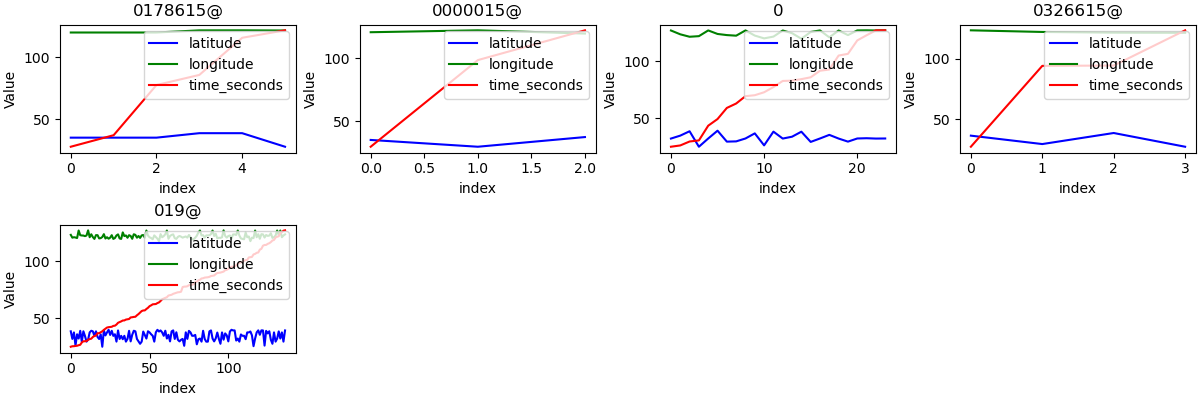

In [12]:
# ships.plot_ship_data(info_df_filtered.index.to_list(),pre_process='remove_bias',x_data_type = 'time',ylim = [-10,10])
ships.plot_ship_data(info_df_filtered.index.to_list(),x_data_type = 'index',ylim = None)


In [ ]:
# ship_df = ships.get_ship_df('0')
ships.plot_ship_data(['0','0'],x_data_type = 'index',sort_columns='time',ylim = None)

In [32]:
def create_subplot_scheme(axes_size=None, num_axes=1, max_axes_in_row=4):
    """
    Creates a subplot scheme and returns an array of axes.

    Parameters:
    ----------
    axes_size : tuple
        Size of each individual subplot (width, height).

    num_axes : int
        Total number of subplots to create.

    max_axes_in_row : int, optional
        Maximum number of subplots in a row. Default is 4.

    Returns:
    -------
    fig : matplotlib.figure.Figure
        The created figure.

    axes : array-like of matplotlib.axes.Axes
        Array of created subplot axes.
    """
    # Calculate the number of rows and columns
    num_cols = min(max_axes_in_row, num_axes)
    num_rows = (num_axes + num_cols - 1) // num_cols  # Ceiling division to ensure all axes fit

    if (axes_size is None):
        if (num_cols==1):
            axes_size=(6, 6/3*2)
        elif (num_cols==2):
            axes_size = (4, 4/3*2)
        elif (num_cols==3):
            axes_size=(3.5, 3.5/3*2)
        elif (num_cols==4):
            axes_size = (3, 2)




    # Calculate figure size based on individual axes size
    fig_width = axes_size[0] * num_cols
    fig_height = axes_size[1] * num_rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), constrained_layout=True)
    
    # Flatten the axes array if there are multiple rows or columns
    if num_rows * num_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Hide any unused subplots
    for i in range(num_axes, len(axes)):
        axes[i].set_visible(False)

    return fig, axes[:num_axes],num_cols,num_rows

In [24]:
4/3*2


2.6666666666666665

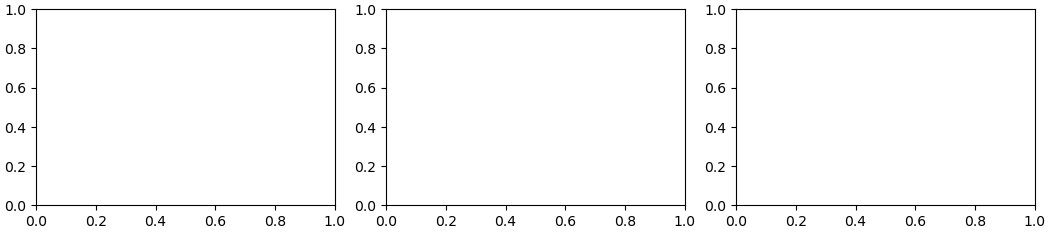

In [35]:
create_subplot_scheme(num_axes=3, max_axes_in_row=4);